In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


import nltk


# **Text Preprocessing**

In [6]:
data_dir = "C:\\Users\\SRI\\Downloads\\nlp proj\\archive\\final\en_US"
file_path = data_dir + "/en_US.twitter.txt"

## nltk settings
nltk.data.path.append(data_dir)
nltk.download('punkt')

with open(file_path, "r", encoding="utf-8") as f:
    data = f.read()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
data = data[:500000]

In [8]:
import re
def remove_emojis_and_special_characters(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    
    return text


In [9]:
def preprocess_pipeline(data) -> 'list':

    # Split by newline character
    sentences = data.split('\n')
    for i  in range(len(sentences)):
        sentences[i] = remove_emojis_and_special_characters(sentences[i])
    # Remove leading and trailing spaces
    sentences = [s.strip() for s in sentences]
    # Drop Empty Sentences
    sentences = [s for s in sentences if len(s) > 0]
    # Empty List to hold Tokenized Sentences
    tokenized = []
    
    # Iterate through sentences
    for sentence in sentences:
        
        # Convert to lowercase
        sentence = sentence.lower()
        
        # Convert to a list of words
        
        # Append to list
        tokenized.append(sentence)
        
    return tokenized

In [10]:
tokenized_sentences = preprocess_pipeline(data)



In [11]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(tokenized_sentences)
total_words = len(tokenizer.word_index) + 1

In [12]:
print(len(tokenized_sentences))

7216


In [13]:
input_sequences = []
for line in tokenized_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [14]:
print(len(input_sequences))

83036


pad sequence

In [15]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, 
                                         maxlen = max_sequence_len,
                                        padding='pre'))
len(input_sequences[1])

34

prepare feature and labels

In [16]:
X,labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

Model

In [17]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, ys, epochs=30, verbose=1)
#print model.summary() 
print(model)


Epoch 1/30



2595/2595 [==============================] - 296s 110ms/step - loss: 7.3136 - accuracy: 0.0418
Epoch 2/30
2595/2595 [==============================] - 274s 106ms/step - loss: 6.6334 - accuracy: 0.0732
Epoch 3/30
2595/2595 [==============================] - 269s 104ms/step - loss: 6.1808 - accuracy: 0.0955
Epoch 4/30
2595/2595 [==============================] - 273s 105ms/step - loss: 5.7392 - accuracy: 0.1120
Epoch 5/30
2595/2595 [==============================] - 284s 109ms/step - loss: 5.2780 - accuracy: 0.1322
Epoch 6/30
2595/2595 [==============================] - 268s 103ms/step - loss: 4.8184 - accuracy: 0.1655
Epoch 7/30
2595/2595 [==============================] - 270s 104ms/step - loss: 4.3719 - accuracy: 0.2137
Epoch 8/30
2595/2595 [==============================] - 260s 100ms/step - loss: 3.9591 - accuracy: 0.2667
Epoch 9/30
2595/2595 [==============================] - 259s 100ms/step - loss: 3.5831 - accuracy: 0.3208
Epoch 10/30
2595/2595 [==============================] - 

In [35]:
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 100)           1317500   
                                                                 
 bidirectional (Bidirection  (None, 300)               301200    
 al)                                                             
                                                                 
 dense (Dense)               (None, 13175)             3965675   
                                                                 
Total params: 5584375 (21.30 MB)
Trainable params: 5584375 (21.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
model.save('lstm.keras')


In [19]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    

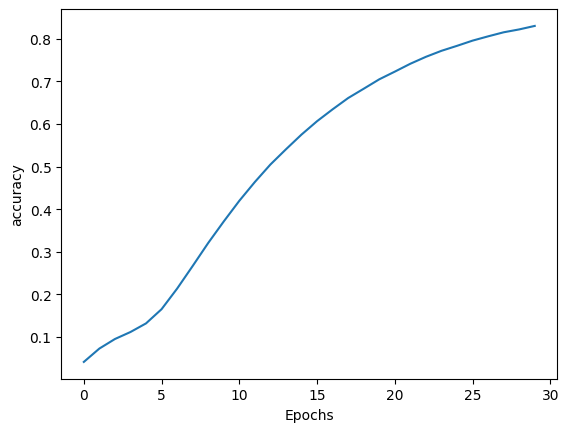

In [20]:
plot_graphs(history, 'accuracy')


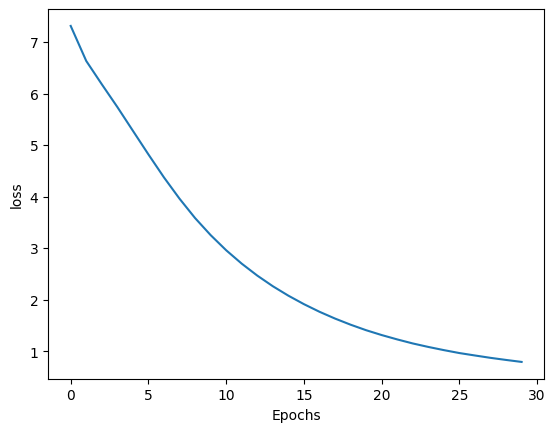

In [21]:
plot_graphs(history, 'loss')

In [33]:
seed_text = "together"
next_words = 3
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)


together will be there
